<a href="https://colab.research.google.com/github/BananaFalls/EE4002R-Deep-Learning-for-Communications/blob/main/EE4002R_CNN_Deep_Learning_Implementation_LKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting full H matrix

In [1]:
import numpy as np

def read_alist(filepath):
    with open(filepath, 'r') as f:
        # Read N (rows) and M (columns)
        N, M = map(int, f.readline().split())
        print(f"N (rows): {N}, M (columns): {M}")

        # Read biggest_num_n and biggest_num_m
        biggest_num_n, biggest_num_m = map(int, f.readline().split())
        print(f"biggest_num_n: {biggest_num_n}, biggest_num_m: {biggest_num_m}")

        # Read num_nlist (1's in each column) and num_mlist (1's in each row)
        num_nlist = list(map(int, f.readline().split()))
        num_mlist = list(map(int, f.readline().split()))
        print(f"num_nlist: {num_nlist}")
        print(f"num_mlist: {num_mlist}")

        # Read nlist: locations of 1's in each column
        nlist = []
        for i in range(N):
            line = list(map(int, f.readline().split()))
            nlist.append(line)
            print(f"nlist[{i}]: {line}")

        # Read mlist: locations of 1's in each row
        mlist = []
        for i in range(M):
            line = list(map(int, f.readline().split()))
            mlist.append(line)
            print(f"mlist[{i}]: {line}")

    # Initialize the LDPC matrix with zeros
    ldpc_matrix = np.zeros((N, M), dtype=int)
    print(f"Initialized LDPC matrix with shape {ldpc_matrix.shape}")

    # Fill the LDPC matrix using nlist and mlist
    for row, cols in enumerate(nlist):
        for col in cols:
            ldpc_matrix[row, col-1] = 1

    return ldpc_matrix

# Example usage
filepath = '/content/96.3.963.txt'
H = read_alist(filepath)

# Set print options to display the full matrix (if necessary)
np.set_printoptions(threshold=np.inf)

# Print matrix
# print(H)

# Transpose the matrix to get dimensions 48 x 96
H_transposed = H.T

# Print dimensions to verify
print("Original dimensions:", H.shape)          # (96, 48)
print("Transposed dimensions:", H_transposed.shape)  # (48, 96)

N (rows): 96, M (columns): 48
biggest_num_n: 3, biggest_num_m: 6
num_nlist: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
num_mlist: [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
nlist[0]: [10, 30, 40]
nlist[1]: [5, 32, 45]
nlist[2]: [16, 18, 39]
nlist[3]: [12, 22, 38]
nlist[4]: [15, 19, 47]
nlist[5]: [2, 17, 34]
nlist[6]: [9, 24, 42]
nlist[7]: [1, 29, 33]
nlist[8]: [4, 27, 36]
nlist[9]: [3, 26, 35]
nlist[10]: [11, 31, 43]
nlist[11]: [7, 21, 44]
nlist[12]: [8, 20, 48]
nlist[13]: [14, 23, 46]
nlist[14]: [6, 28, 37]
nlist[15]: [13, 25, 41]
nlist[16]: [14, 32, 43]
nlist[17]: [5, 23, 37]
nlist[18]: [2, 31, 36]
nlist[19]: [1, 28, 34]
nlist[20]: [7, 25, 47

# Obtaining the generator matrix: G

In [2]:
import numpy as np

# Example parity-check matrix H in systematic form [P | I]
# Separate H into P and I components if H is in systematic form
m, n = H_transposed.shape
# print(m)
# print(n)

k = n - m  # Number of message bits
P = H_transposed[:, :k]  # Extract P from the left part of H
print(P.shape)

I = np.eye(k, dtype=int)  # Identity matrix of size k
print(I.shape)

# Construct G = [I | P^T]
G = np.hstack((I, P.T))
print(G.shape)

# Define a random message to encode (binary vector of length k)
message = np.random.randint(0, 2, k)

# Encode the message using G
codeword = np.mod(message @ G, 2)
print("Message:", message)
print("Encoded Codeword:", codeword)

(48, 48)
(48, 48)
(48, 96)
Message: [0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1
 0 0 0 0 0 0 0 1 0 1 0]
Encoded Codeword: [0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1
 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0
 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1]


In [ ]:
import numpy as np
from itertools import product

def generate_all_codewords(k):
    # Generate all possible binary combinations of length k
    codewords = list(product([0, 1], repeat=k))
    # Convert the list of tuples to a NumPy array
    codeword_matrix = np.array(codewords, dtype=int)
    return codeword_matrix

# Example usage for k = 3
k = 48
codeword_matrix = generate_all_codewords(k)
print("All possible codewords:\n", codeword_matrix)

# Save the codeword
np.save("codeword_matrix.npy", codeword_matrix)

# 2. Pipeline to find a good one

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import accuracy_score
from collections import defaultdict

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Parameters
codeword_length = 48
learning_rate = 0.001
epochs = 100
batch_size = 32

# Make sure noise
# Function to generate data
def generate_data(batch_size, snr_db):
    data = np.random.randint(0, 2, (batch_size, codeword_length))  # Random binary codeword
    bpsk_modulated = 1 - 2 * data  # BPSK: 0 -> 1, 1 -> -1
    snr_linear = 10 ** (snr_db / 10)
    noise_std_dev = np.sqrt(1 / (2 * snr_linear))
    noise = noise_std_dev * np.random.randn(batch_size, codeword_length)
    received_signal = bpsk_modulated + noise  # Add AWGN noise
    return torch.tensor(received_signal, dtype=torch.float32).to(device), torch.tensor(data, dtype=torch.float32).to(device)

# Define Model Architectures
class MLPDecoder(nn.Module):
    def __init__(self):
        super(MLPDecoder, self).__init__()
        self.fc1 = nn.Linear(codeword_length, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, codeword_length)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

class CNNDecoder(nn.Module):
    def __init__(self):
        super(CNNDecoder, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * codeword_length, codeword_length)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten
        x = self.sigmoid(self.fc1(x))
        return x

class RNNDecoder(nn.Module):
    def __init__(self):
        super(RNNDecoder, self).__init__()
        self.rnn = nn.GRU(input_size=codeword_length, hidden_size=64, num_layers=1, batch_first=True)
        self.fc = nn.Linear(64, codeword_length)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x, _ = self.rnn(x.unsqueeze(1))  # Add sequence dimension
        x = self.sigmoid(self.fc(x.squeeze(1)))
        return x

# Function to train a model
def train_model(model, optimizer, criterion, snr_db, num_batches=1000):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for _ in range(num_batches):
            inputs, targets = generate_data(batch_size, snr_db)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
    return epoch_loss / num_batches

# Function to evaluate a model
def evaluate_model(model, snr_db, num_batches=100):
    model.eval()
    correct_bits = 0
    total_bits = 0
    with torch.no_grad():
        for _ in range(num_batches):
            inputs, targets = generate_data(batch_size, snr_db)
            outputs = model(inputs)
            predictions = (outputs > 0.5).float()
            correct_bits += (predictions == targets).sum().item()
            total_bits += targets.numel()
    return correct_bits / total_bits

# Main pipeline to train and evaluate models
def model_pipeline():
    # Define models, optimizers, and loss
    models = {
        "MLP": MLPDecoder().to(device),
        "CNN": CNNDecoder().to(device),
        "RNN": RNNDecoder().to(device)
    }
    results = defaultdict(dict)
    criterion = nn.BCELoss()

    # Training and evaluating each model
    for model_name, model in models.items():
        print(f"\nTraining {model_name} Model")
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        # Train model
        train_snr_db = 1.0
        avg_loss = train_model(model, optimizer, criterion, train_snr_db)

        # Evaluate model
        test_snr_db = 1.0
        accuracy = evaluate_model(model, test_snr_db)

        # Save results
        results[model_name]['Avg Training Loss'] = avg_loss
        results[model_name]['Test Accuracy'] = accuracy
        print(f"{model_name} - Avg Loss: {avg_loss:.4f}, Test Accuracy: {accuracy:.4f}")

    return results

# Run pipeline and display results
results = model_pipeline()
print("\nModel Comparison Results:")
for model_name, metrics in results.items():
    print(f"{model_name}: {metrics}")



Training MLP Model
MLP - Avg Loss: 0.1614, Test Accuracy: 0.9356

Training CNN Model
CNN - Avg Loss: 0.1432, Test Accuracy: 0.9434

Training RNN Model
RNN - Avg Loss: 0.1535, Test Accuracy: 0.9399

Model Comparison Results:
MLP: {'Avg Training Loss': 0.1613516981601715, 'Test Accuracy': 0.93564453125}
CNN: {'Avg Training Loss': 0.14317419005185367, 'Test Accuracy': 0.9433919270833333}
RNN: {'Avg Training Loss': 0.15346185376495122, 'Test Accuracy': 0.939921875}


Observation: CNN seems to have a better test accuracy, thus we decided to go with that model to optimise

# 3. CNN model, short codeword length (48-bit -> 96-bit encoded message)

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import accuracy_score

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Parameters
decoded_length = 48
learning_rate = 0.001
epochs = 100
batch_size = 64
# momentum = 0.9
encoded_length = 96

# Generate random BPSK modulated data with AWGN (using variable SNR for augmentation)
def generate_data(batch_size, snr_db):

  np.random.seed(np.random.randint(0, 10000))  # Randomize the seed

  # Generate codewords
  data = np.random.randint(0, 2, (batch_size, decoded_length))  # Random binary codeword
  # print(data.shape)

  # Encode data using generator matrix
  encoded_data = np.mod(data @ G, 2)  # Shape (batch_size, G)
  # print(encoded_data.shape)

  # BPSK Modulation
  bpsk_modulated = 1 - 2 * encoded_data  # BPSK: 0 -> 1, 1 -> -1

  # Obtain noise
  snr_linear = 10 ** (snr_db / 10)
  noise_std_dev = np.sqrt(1 / (2 * snr_linear))
  noise = noise_std_dev * np.random.randn(batch_size, encoded_length)

  # Add noise to bpsk-modulated and encoded data
  received_signal = bpsk_modulated + noise  # Add AWGN noise
  # print(received_signal.shape)

  return torch.tensor(received_signal, dtype=torch.float32).to(device), torch.tensor(data, dtype=torch.float32).to(device)

# Improved CNN Model with Batch Normalization, Dropout, and Extra Layers
class ImprovedCNNDecoder(nn.Module):
    def __init__(self):
        super(ImprovedCNNDecoder, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * encoded_length, 256)
        self.fc2 = nn.Linear(256, decoded_length)

        # Activation and regularization layers
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.3)
        self.batch_norm1 = nn.BatchNorm1d(32)
        self.batch_norm2 = nn.BatchNorm1d(64)
        self.batch_norm3 = nn.BatchNorm1d(128)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension
        # print("After unsqueeze:", x.shape)  # Print shape after adding channel dimension

        # Convolutional layers with batch normalization and ReLU activation
        x = torch.relu(self.batch_norm1(self.conv1(x)))
        # print("After conv1:", x.shape)  # Print shape after conv1

        x = torch.relu(self.batch_norm2(self.conv2(x)))
        # print("After conv2:", x.shape)  # Print shape after conv2

        x = torch.relu(self.batch_norm3(self.conv3(x)))
        # print("After conv3:", x.shape)  # Print shape after conv3

        # Flatten before fully connected layers
        x = x.view(x.size(0), -1)  # Flatten
        # print("After flatten:", x.shape)  # Print shape after flattening

        # Fully connected layers
        x = torch.relu(self.fc1(x))
        # print("After fc1:", x.shape)  # Print shape after fc1

        x = self.dropout(x)  # Apply dropout
        x = self.sigmoid(self.fc2(x))
        # print("After fc2 (output):", x.shape)  # Print shape after fc2

        return x

# Training function with SNR augmentation
def train_model(model, optimizer, criterion, num_batches=1000):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for _ in range(num_batches):
            # Randomize SNR for augmentation
            snr_db = np.random.uniform(0, 2)
            inputs, targets = generate_data(batch_size, snr_db)
            optimizer.zero_grad()
            outputs = model(inputs)
            # print(outputs.shape)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss / num_batches:.4f}")

# Main script
model = ImprovedCNNDecoder().to(device)
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss with label smoothing
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)  # L2 regularization

# Using SGD optimizer with momentum
# optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=1e-4)

# Train the model
train_model(model, optimizer, criterion)

Epoch [1/100], Loss: 0.4156
Epoch [2/100], Loss: 0.3590
Epoch [3/100], Loss: 0.3087
Epoch [4/100], Loss: 0.2445
Epoch [5/100], Loss: 0.2072
Epoch [6/100], Loss: 0.1836
Epoch [7/100], Loss: 0.1688
Epoch [8/100], Loss: 0.1522
Epoch [9/100], Loss: 0.1384
Epoch [10/100], Loss: 0.1282
Epoch [11/100], Loss: 0.1226
Epoch [12/100], Loss: 0.1170
Epoch [13/100], Loss: 0.1132
Epoch [14/100], Loss: 0.1104
Epoch [15/100], Loss: 0.1079
Epoch [16/100], Loss: 0.1046
Epoch [17/100], Loss: 0.1024
Epoch [18/100], Loss: 0.1003
Epoch [19/100], Loss: 0.0976
Epoch [20/100], Loss: 0.0967
Epoch [21/100], Loss: 0.0954
Epoch [22/100], Loss: 0.0946
Epoch [23/100], Loss: 0.0936
Epoch [24/100], Loss: 0.0920
Epoch [25/100], Loss: 0.0902
Epoch [26/100], Loss: 0.0888
Epoch [27/100], Loss: 0.0883
Epoch [28/100], Loss: 0.0873
Epoch [29/100], Loss: 0.0862
Epoch [30/100], Loss: 0.0849
Epoch [31/100], Loss: 0.0842
Epoch [32/100], Loss: 0.0830
Epoch [33/100], Loss: 0.0819
Epoch [34/100], Loss: 0.0805
Epoch [35/100], Loss: 0

# 3.1 Printing the number of parameters & training data

In [ ]:
 # Calculate and print the number of trainable parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {total_params}")

# Calculate and print the number of training data points per epoch
training_data_points = batch_size * 1000
print(f"Total training data points per epoch: {training_data_points}")

print(f"Total number of epochs: {epochs}")



Total trainable parameters: 3189808
Total training data points per epoch: 64000
Total number of epochs: 100


# 3.2 Evaluating Model

In [6]:
# Evaluation function
def evaluate_model(model, snr_db, num_batches=100):
    model.eval()
    correct_bits = 0
    total_bits = 0
    with torch.no_grad():
        for _ in range(num_batches):
            inputs, targets = generate_data(batch_size, snr_db)
            # print(inputs.shape)
            # print(targets.shape)

            outputs = model(inputs)
            # print(outputs)

            predictions = (outputs > 0.5).float()
            # print(predictions)

            correct_bits += (predictions == targets).sum().item()
            # print(correct_bits)

            total_bits += targets.numel()
            # print(total_bits)

    accuracy = correct_bits / total_bits
    print(f"Test Accuracy at SNR {snr_db} dB: {accuracy:.4f}")
    return accuracy

# Test the model over 10 snr levels
snr_db_test = [ 1.0 * i for i in range(11) ]  # Test at a fixed SNR for consistency
for snr_db in snr_db_test:
  test_accuracy = evaluate_model(model, snr_db)

Test Accuracy at SNR 0.0 dB: 0.9051
Test Accuracy at SNR 1.0 dB: 0.9289
Test Accuracy at SNR 2.0 dB: 0.9487
Test Accuracy at SNR 3.0 dB: 0.9651
Test Accuracy at SNR 4.0 dB: 0.9780
Test Accuracy at SNR 5.0 dB: 0.9866
Test Accuracy at SNR 6.0 dB: 0.9924
Test Accuracy at SNR 7.0 dB: 0.9958
Test Accuracy at SNR 8.0 dB: 0.9976
Test Accuracy at SNR 9.0 dB: 0.9985
Test Accuracy at SNR 10.0 dB: 0.9991


# 3.3 Performance against benchmark: BER vs SNR graph (short codeword)

SNR: 1 dB, Encoded CNN BER: 0.070840, Uncoded BPSK BER: 0.056282
SNR: 2 dB, Encoded CNN BER: 0.051598, Uncoded BPSK BER: 0.037506
SNR: 3 dB, Encoded CNN BER: 0.034827, Uncoded BPSK BER: 0.022878
SNR: 4 dB, Encoded CNN BER: 0.022080, Uncoded BPSK BER: 0.012501
SNR: 5 dB, Encoded CNN BER: 0.013405, Uncoded BPSK BER: 0.005954
SNR: 6 dB, Encoded CNN BER: 0.007601, Uncoded BPSK BER: 0.002388
SNR: 7 dB, Encoded CNN BER: 0.004248, Uncoded BPSK BER: 0.000773
SNR: 8 dB, Encoded CNN BER: 0.002376, Uncoded BPSK BER: 0.000191
SNR: 9 dB, Encoded CNN BER: 0.001449, Uncoded BPSK BER: 0.000034
SNR: 10 dB, Encoded CNN BER: 0.000951, Uncoded BPSK BER: 0.000004


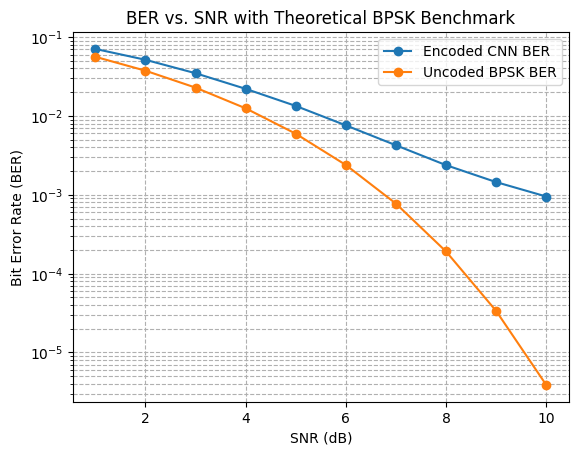

In [7]:
import matplotlib.pyplot as plt
from scipy.special import erfc
import numpy as np

# Calculate the theoretical BER for BPSK
def theoretical_ber_bpsk(snr_db):
    snr_linear = 10 ** (snr_db / 10)
    return 0.5 * erfc(np.sqrt(snr_linear))

# Function to calculate BER for a specific SNR
def calculate_ber(model, snr_db, num_batches=100):
    model.eval()
    incorrect_bits = 0
    total_bits = 0
    with torch.no_grad():
        for _ in range(num_batches):
            inputs, targets = generate_data(batch_size, snr_db)
            outputs = model(inputs)
            predictions = (outputs > 0.5).float()
            incorrect_bits += (predictions != targets).sum().item()
            total_bits += targets.numel()
    ber = incorrect_bits / total_bits
    return ber

# Evaluate and plot BER vs. SNR with theoretical benchmark
def plot_ber_vs_snr_with_theoretical(model, snr_range):
    model_ber_values = []
    theoretical_ber_values = []

    for snr_db in snr_range:
        # Model BER
        model_ber = calculate_ber(model, snr_db)
        model_ber_values.append(model_ber)

        # Theoretical BER for BPSK
        theoretical_ber = theoretical_ber_bpsk(snr_db)
        theoretical_ber_values.append(theoretical_ber)

        print(f"SNR: {snr_db} dB, Encoded CNN BER: {model_ber:.6f}, Uncoded BPSK BER: {theoretical_ber:.6f}")

    # Plot BER vs SNR
    plt.figure()
    plt.plot(snr_range, model_ber_values, marker='o', label="Encoded CNN BER")
    plt.plot(snr_range, theoretical_ber_values, marker='o', label="Uncoded BPSK BER")
    plt.yscale('log')  # Log scale for BER
    plt.xlabel("SNR (dB)")
    plt.ylabel("Bit Error Rate (BER)")
    plt.title("BER vs. SNR with Theoretical BPSK Benchmark")
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()

# Define SNR range for the plot
snr_range = np.arange(1, 11, 1)  # SNR values from 0 to 9 dB
plot_ber_vs_snr_with_theoretical(model, snr_range)


# David MacKay's parity check matrix

In [8]:
import numpy as np

# Data from the user's input
dm_data = """
29  16 0  16   13  0.9844    1.12    1.12   48   96  183    0  183   0.5517    0.65    0.47  0.06573   0.078   0.056     0.552     1e-08   5     0.172  171    0    0.0339     1e-08
35  16 0  16   19   1.289    1.16    1.16   48   96  190    0  190   0.4571    0.55    0.38  0.05655   0.068   0.047     0.457     1e-08   2    0.0571  397    0    0.0282     1e-08
45  16 0  16   29   1.584     1.2     1.2   48   96  175    0  175   0.3556    0.43    0.29  0.04051    0.05   0.033     0.356     1e-08   4    0.0889  196    0     0.022     1e-08
61  16 2  14   47   1.868    1.24    1.24   48   96  156   26  130   0.2623    0.33    0.21  0.02664   0.033   0.021      0.23    0.0328   6    0.0984  304    0    0.0657    0.0164
169  16 1  15  154   2.411    1.32    1.32   48   96  156   14  142  0.09467    0.12   0.075 0.009615   0.012  0.0076    0.0888   0.00592   7    0.0414  826    0     0.016   0.00218
268   6 1   5  263   2.923       1.4    1.4   48   96   67   20   47  0.02239   0.034   0.015 0.002604  0.0039  0.0017    0.0187   0.00373   3    0.0112 1028    0    0.0101   0.00138
3477  36 5  31 3446   3.522     1.5     1.5   48   96  356   42  314  0.01035   0.012  0.0088 0.001067  0.0013  0.0009   0.00892   0.00144  13   0.00374 10769    0   0.00225   0.00092
4000   5 1   4 3996   4.082     1.6     1.6   48   96   59    8   51  0.00125   0.002  0.0008 0.0001536 0.00024 9.8e-05     0.001   0.00025   0         0 8402    0  0.000679   9.2e-05
97228  30 5  25 97203   4.609     1.7     1.7   48   96  280   36  244 0.0003086 0.00037 0.00026    3e-05 3.6e-05 2.5e-05  0.000257  5.14e-05  13  0.000134 161844    0  8.04e-05  3.29e-05
174000   9 4   5 173995   5.105     1.8     1.8   48   96   90   28   62 5.172e-05 7.2e-05 3.7e-05 5.388e-06 7.5e-06 3.9e-06  2.87e-05   2.3e-05   2  1.15e-05 240007    0  3.79e-05  1.39e-05
24000   0 0   0 24000   6.021       2       2   48   96    0    0    0    1e-08 4.2e-05   1e-08        0       0       0         0     1e-08   0         0 26750    0  4.17e-05     1e-08
"""

# Convert the string to a list of lines
lines = dm_data.strip().split('\n')

# Extract the necessary columns: x (SNR, 6th column) and bit_ep (BER, 16th column)
# Initialize lists to store values
dm_snr_values = []
dm_ber_values = []

# Loop through each line and split the columns by spaces
for line in lines:
    columns = line.split()
    dm_snr_values.append(float(columns[6]))  # SNR is the 6th column (index 5)
    dm_ber_values.append(float(columns[16])) # BER is the 16th column (index 15)

# Convert to numpy arrays
dm_snr_array = np.array(dm_snr_values)
dm_ber_array = np.array(dm_ber_values)


# Performance Graph of Coded LDPC, Coded CNN & Uncoded LDPC

SNR: 1.0 dB, Encoded CNN BER: 0.071178, Uncoded BPSK BER: 0.056282
SNR: 1.5 dB, Encoded CNN BER: 0.060404, Uncoded BPSK BER: 0.046401
SNR: 2.0 dB, Encoded CNN BER: 0.051302, Uncoded BPSK BER: 0.037506
SNR: 2.5 dB, Encoded CNN BER: 0.042640, Uncoded BPSK BER: 0.029655
SNR: 3.0 dB, Encoded CNN BER: 0.034935, Uncoded BPSK BER: 0.022878
SNR: 3.5 dB, Encoded CNN BER: 0.028034, Uncoded BPSK BER: 0.017173
SNR: 4.0 dB, Encoded CNN BER: 0.022106, Uncoded BPSK BER: 0.012501
SNR: 4.5 dB, Encoded CNN BER: 0.017064, Uncoded BPSK BER: 0.008794


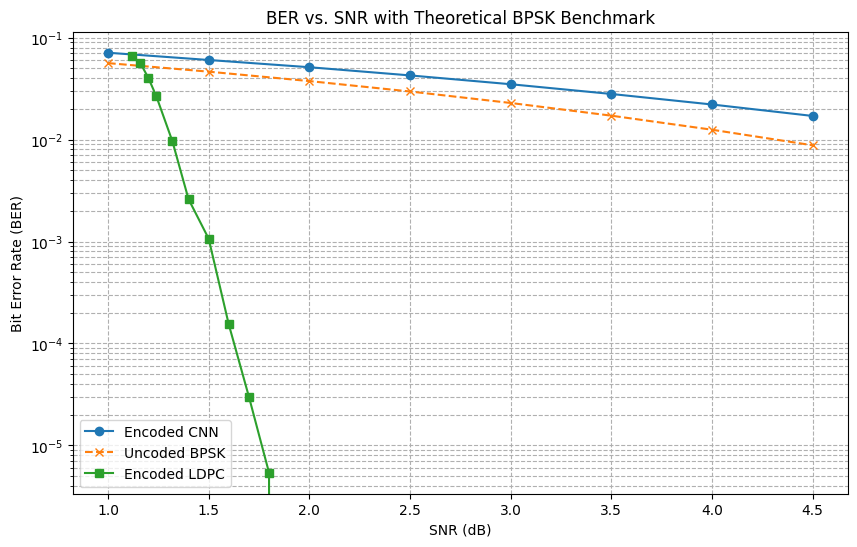

In [9]:
import matplotlib.pyplot as plt
from scipy.special import erfc
import numpy as np

# Calculate the theoretical BER for BPSK
def theoretical_ber_bpsk(snr_db):
    snr_linear = 10 ** (snr_db / 10)
    return 0.5 * erfc(np.sqrt(snr_linear))

# Function to calculate BER for a specific SNR
def calculate_ber(model, snr_db, num_batches=100):
    model.eval()
    incorrect_bits = 0
    total_bits = 0
    with torch.no_grad():
        for _ in range(num_batches):
            inputs, targets = generate_data(batch_size, snr_db)
            outputs = model(inputs)
            predictions = (outputs > 0.5).float()
            incorrect_bits += (predictions != targets).sum().item()
            total_bits += targets.numel()
    ber = incorrect_bits / total_bits
    return ber

# Evaluate and plot BER vs. SNR with theoretical benchmark
def plot_ber_vs_snr_with_theoretical(model, snr_range, dm_snr_array, dm_ber_array):
    model_ber_values = []
    theoretical_ber_values = []

    for snr_db in snr_range:
        # Model BER
        model_ber = calculate_ber(model, snr_db)
        model_ber_values.append(model_ber)

        # Theoretical BER for BPSK
        theoretical_ber = theoretical_ber_bpsk(snr_db)
        theoretical_ber_values.append(theoretical_ber)

        print(f"SNR: {snr_db} dB, Encoded CNN BER: {model_ber:.6f}, Uncoded BPSK BER: {theoretical_ber:.6f}")

    # Plot BER vs SNR
    plt.figure(figsize=(10, 6))
    plt.plot(snr_range, model_ber_values, marker='o', label="Encoded CNN")
    plt.plot(snr_range, theoretical_ber_values, marker='x', linestyle='--', label="Uncoded BPSK")
    plt.plot(dm_snr_array, dm_ber_array, marker='s', linestyle='-', label="Encoded LDPC")

    # Configure plot settings
    plt.yscale('log')  # Log scale for BER
    plt.xlabel("SNR (dB)")
    plt.ylabel("Bit Error Rate (BER)")
    plt.title("BER vs. SNR with Theoretical BPSK Benchmark")
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()

# Define SNR range for the plot
snr_range = np.arange(1, 5, 0.5)  # SNR values from 1 to 10 dB

# Add your DM data arrays here
dm_snr_array = np.array([1.12, 1.16, 1.2, 1.24, 1.32, 1.4, 1.5, 1.6, 1.7, 1.8, 2.0])
dm_ber_array = np.array([6.573e-02, 5.655e-02, 4.051e-02, 2.664e-02, 9.615e-03, 2.604e-03,
                         1.067e-03, 1.536e-04, 3.000e-05, 5.388e-06, 0.000e+00])

# Call the plotting function with model and DM data
plot_ber_vs_snr_with_theoretical(model, snr_range, dm_snr_array, dm_ber_array)
